## Import de la donnée

In [77]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# TODO: Import the dataset into the variable
df_marketing= pd.read_csv("marketing_campaign.csv", sep="\t")
df_marketing


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [79]:
df_marketing.shape


(2240, 29)

In [80]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Nettoyage de la donnée

In [81]:
df_marketing.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

In [82]:
df_marketing["Response"].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [83]:
print(df_marketing.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


## Nettoyage de la colonne Income

In [84]:
# Vérifier les types de données
print(df_marketing.dtypes)

print(df_marketing['Income'].unique())

# Vérifier s'il y a des caractères spéciaux ou du texte
print(df_marketing["Income"].apply(lambda x: type(x)).value_counts())

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object
[58138. 46344. 71613. ... 56981. 69245. 52869.]
<class 'float'>    2240
Name: Income, d

In [89]:
# Supprimer les espaces et convertir en texte (au cas où)
df_marketing["Income"] = df_marketing["Income"].astype(str).str.strip()

# Supprimer caractères spéciaux (€,$, etc.)
df_marketing["Income"] = df_marketing["Income"].str.replace(r"[^\d.]", "", regex=True)

df_marketing['Income'] = pd.to_numeric(df_marketing['Income'], errors='coerce')

# Vérifier les valeurs NaN après conversion
print(df_marketing["Income"].isna().sum())

# Remplacer les valeur Nan par la Médiane
df_marketing['Income'].fillna(df_marketing['Income'].median(), inplace= True)

0


In [97]:
print(df_marketing["Income"].unique())


[58138. 46344. 71613. ... 56981. 69245. 52869.]


### Convertir la colonne "Dt_customer" en Format Datetime:

In [86]:
from datetime import datetime
df_marketing['Dt_Customer']= pd.to_datetime(df_marketing['Dt_Customer'], format='%d-%m-%Y')
df_marketing['Customer_age']=(datetime.today()-df_marketing['Dt_Customer']).dt.days

df_marketing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,4573
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,4023
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,4222
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,4049
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,4071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,4291
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,3929
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,4065
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,4066


### Conversion de la colonne Marital_Status en (numerique)

In [87]:
marital_mapping = {
    "Single": 0, 
    "Married": 1, 
    "Together": 2, 
    "Divorced": 3, 
    "Widow": 4, 
    "Absurd": 5, 
    "Alone": 6, 
    "YOLO": 7  # Si ces catégories existent dans ton dataset
}

df_marketing["Marital_status_Num"]=df_marketing["Marital_Status"].map(marital_mapping)
print(df_marketing[["Marital_status_Num", "Marital_Status"]])

      Marital_status_Num Marital_Status
0                      0         Single
1                      0         Single
2                      2       Together
3                      2       Together
4                      1        Married
...                  ...            ...
2235                   1        Married
2236                   2       Together
2237                   3       Divorced
2238                   2       Together
2239                   1        Married

[2240 rows x 2 columns]


### Création d'une nouvelle variable "Total des dépenses"

In [88]:
df_marketing["Total_des_dépenses"] = df_marketing[['MntWines','MntFruits','MntMeatProducts','MntFishProducts',
                                                    'MntSweetProducts','MntGoldProds']].sum(axis=1)
df_marketing["Total_des_dépenses"].head()

0    1617
1      27
2     776
3      53
4     422
Name: Total_des_dépenses, dtype: int64

## Partie Visualisation

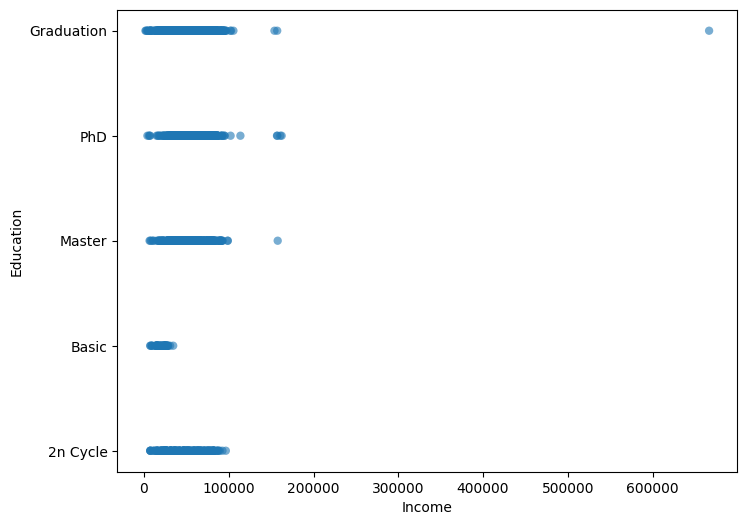

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création du scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_marketing, x="Income", y="Education", alpha=0.6, edgecolor="none")


plt.show()

On remarque que les clients ont tous relativement le meme revenu annuel (environ 100 000 dollard annuel) quelque que soit leur niveau d'étude 
Sauf les clients qui ont une reçu une éducation scolaire "Basic" ils touchent moins
Aussi il y a des outsiders eux touchent (environ 200 000 dollard annuel)

## Corréllation entre revenue et status marital

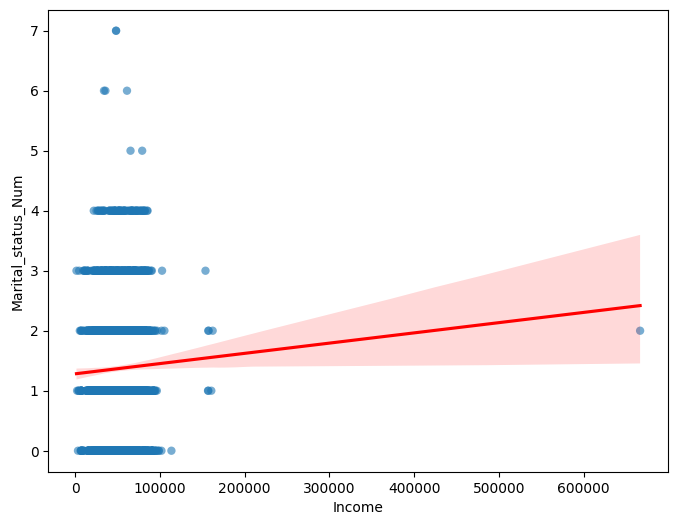

In [69]:
# Création du scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(data= df_marketing ,x="Income", y="Marital_status_Num", alpha=0.6, edgecolor="none")

# Ajout d'une ligne de tendance
sns.regplot(data= df_marketing , x="Income", y="Marital_status_Num", scatter=False, color="red")

plt.show()

On observe une légère tendance positive : plus le revenu est élevé, plus les individus tendent à être dans certaines catégories de statut matrimonial.
La pente de la régression est faible, ce qui indique que Income n'a pas un impact fort sur Marital_Status.

Les différentes catégories sont bien séparées (indiquant qu'il s'agit d'une variable catégorique).
Les revenus sont dispersés dans chaque catégorie, mais on remarque que certains statuts ont une plus grande concentration autour de faibles revenus.

Il y a quelques points très hauts revenus (600,000€+), ce qui peut indiquer des valeurs atypiques ou des clients particuliers.

## Corrélation entre engagement et historique client

### Import de sklearn prepocessing

In [70]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [71]:
df_feature = df_marketing.copy()

df_feature = pd.DataFrame(df_feature)

df_feature["Dt_Customer"] = pd.to_datetime(df_feature["Dt_Customer"], format="%d-%m-%Y")
df_feature["Customer_Age"] = (pd.to_datetime("today") - df_feature["Dt_Customer"]).dt.days


feature = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumDealsPurchases",
            "NumWebVisitsMonth", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", 
            "Response", "Recency", "Customer_Age", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",
            "MntSweetProducts", "MntGoldProds"]


scaler = MinMaxScaler()
df_feature[feature] = scaler.fit_transform(df_feature[feature])

# Création de la feature combinée (somme pondérée)
df_feature["Engagement_History_Score"] = (
    df_feature["NumWebPurchases"] * 0.1 +
    df_feature["NumCatalogPurchases"] * 0.1 +
    df_feature["NumStorePurchases"] * 0.1 +
    df_feature["NumDealsPurchases"] * 0.1 +
    df_feature["NumWebVisitsMonth"] * 0.05 +
    (df_feature["AcceptedCmp1"] + df_feature["AcceptedCmp2"] + df_feature["AcceptedCmp3"] +
     df_feature["AcceptedCmp4"] + df_feature["AcceptedCmp5"] + df_feature["Response"]) * 0.05 +
    (1 - df_feature["Recency"]) * 0.15 +  # Plus la récence est faible, plus le client est engagé
    df_feature["Customer_Age"] * 0.15 +   # Plus le client est ancien, plus il a d'historique
    (df_feature["MntWines"] + df_feature["MntFruits"] + df_feature["MntMeatProducts"] +
     df_feature["MntFishProducts"] + df_feature["MntSweetProducts"] + df_feature["MntGoldProds"]) * 0.2
)

# Vérification
df_feature[["Engagement_History_Score"]].head()

,Engagement_History_Score
0,0.873177
1,0.173960
2,0.553847
3,0.227523
4,0.307758


In [72]:
print(type(df_feature))

<class 'pandas.core.frame.DataFrame'>


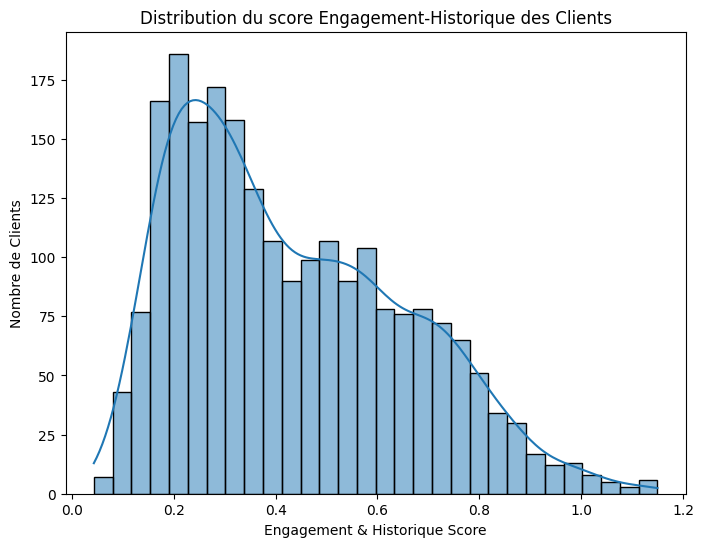

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df_feature["Engagement_History_Score"], bins=30, kde=True)
plt.xlabel("Engagement & Historique Score")
plt.ylabel("Nombre de Clients")
plt.title("Distribution du score Engagement-Historique des Clients")
plt.show()

On pourrait classer les clients en trois groupes :

Faible engagement (score < 0.4)
Engagement moyen (score entre 0.4 et 0.7)
Forte fidélité (score > 0.7)

La majorité des clients ont un score d'engagement entre 0.2 et 0.5.
Une longue traîne vers la droite signifie qu'il y a quelques clients très engagés, mais qu'ils sont rares.

Présence de plusieurs pics :

On observe un pic principal autour de 0.2 - 0.3, indiquant un grand nombre de clients peu engagés.
Un deuxième pic plus loin autour de 0.6 - 0.7, ce qui suggère un groupe de clients avec un engagement moyen.
Cela peut indiquer deux segments distincts de clients.

Peu de clients très engagés (score > 0.8)

Seuls quelques clients ont un score supérieur à 0.8, ce qui signifie que les clients très engagés sont minoritaires.

In [74]:
df_marketing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_age,Marital_status_Num,Total_des_dépenses
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,4573,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,4023,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,4222,2,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,4049,2,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,4071,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,4291,1,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,3,11,0,3929,2,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,4065,3,1241
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,4066,2,843


In [98]:
df_marketing.to_csv("marketing_cleaned.csv", index=False)
"marketing_cleaned.csv"


'marketing_cleaned.csv'

In [90]:
print(df_marketing["Income"])


0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64
